# Probability Analysis in Trading

In [1]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime

import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from market.market_data import MarketData
mkt = MarketData()

C:\Anaconda3\envs\finance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [6]:
eth_price = mkt.get_crypto_price_data('ETH', start_date=datetime.datetime(2018,1,26))

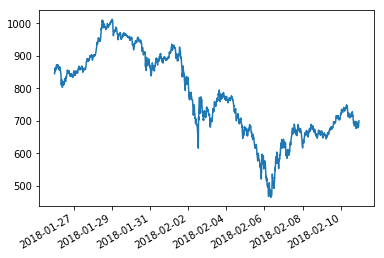

In [3]:
eth_price.plot()

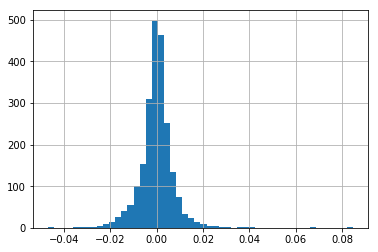

In [8]:
eth_rets = mkt.crypto_returns_data('ETH', time_step='10T', start_date=datetime.datetime(2018,1,26))
eth_rets.hist(bins=50)

# Quest for invariance
Two tests for invariance are necessary. The next function makes those two tests:

In [56]:
def test_invariance(data):
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    # test 1
    N = len(data)
    first_half = data.iloc[:int(N/2)]
    second_half = data.iloc[int(N/2)+1:]
    first_half.hist(bins=50, alpha=0.6, ax=ax[0], normed=True)
    second_half.hist(bins=50, alpha=0.6, ax=ax[0], normed=True)
    ax[0].set_title('Test invariance 1')
    
    # test 2
    ax[1].scatter(data[:-2], data[1:-1])
    ax[1].set_title('Test invariance 2')
    return ax
    

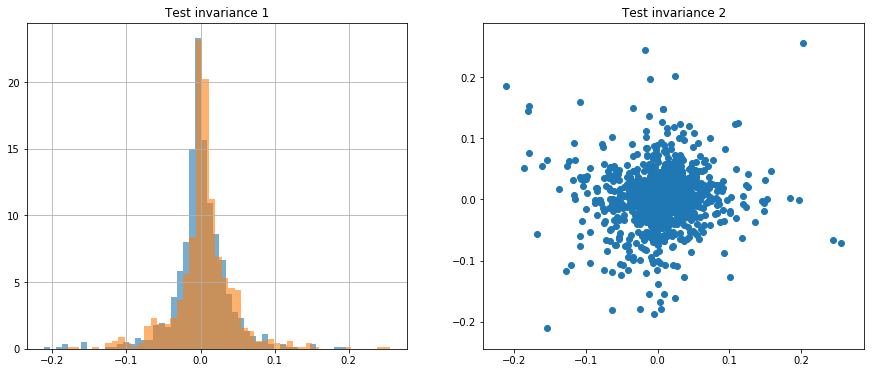

In [68]:
data = mkt.crypto_returns_data('BTC', time_step='D').dropna()#, start_date=datetime.datetime(2018,1,26)).dropna()
ax = test_invariance(data)

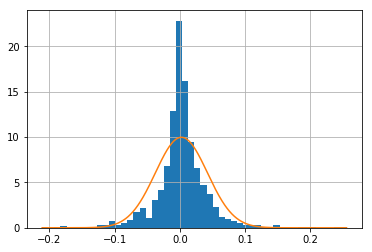

In [71]:
#normal fit
data.hist(bins=50, normed=True)
x =np.linspace(data.min(),data.max(),1000)
mu, std = norm.fit(data)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, label='Daily')

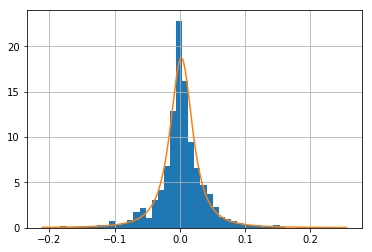

In [77]:
#normal fit
from scipy.stats import t
data.hist(bins=50, normed=True)
x =np.linspace(data.min(),data.max(),1000)
parameters = t.fit(data)
pdf = t.pdf(x, *parameters)
plt.plot(x, pdf, label='Daily')